<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/PCA_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Project-Breast Cancer

## Import libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset from sklearn

In [38]:
from sklearn.datasets import load_breast_cancer

In [39]:
cancer = load_breast_cancer()

In [40]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Create Dataset

In [41]:
X = pd.DataFrame(cancer['data'], columns =cancer['feature_names'])

## EDA

In [42]:
X.shape

(569, 30)

In [43]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [52]:
# change float 64 ---> float 16
for col in X:
  X[col]= X[col].astype(np.float16)

In [53]:
X.dtypes.value_counts()

float16    30
dtype: int64

## Scale Values

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mms = MinMaxScaler()

In [56]:
X_sc = mms.fit_transform(X)

In [58]:
X = pd.DataFrame(X_sc,columns = cancer['feature_names'])

## PCA

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA()

In [92]:
X_pca = pca.fit_transform(X)

In [94]:
X_pca

array([[ 1.38701837e+00,  4.26911624e-01, -5.41710461e-01, ...,
        -4.47900304e-03,  6.23898628e-03, -8.01263197e-03],
       [ 4.62374253e-01, -5.56894361e-01, -2.05330102e-01, ...,
         4.11332602e-03, -3.51104002e-04, -2.83051717e-04],
       [ 9.54514536e-01, -1.09658089e-01, -1.47739729e-01, ...,
         5.04749922e-03,  1.03980170e-03,  4.11769092e-05],
       ...,
       [ 2.26238582e-01, -2.88026273e-01,  3.15027770e-01, ...,
        -1.95294800e-04,  9.92195759e-04,  5.97192648e-04],
       [ 1.67797841e+00,  3.35885632e-01,  2.96324443e-01, ...,
        -8.35490709e-03, -1.37236521e-02, -3.94073769e-03],
       [-9.05098029e-01, -1.04136474e-01,  3.82794038e-01, ...,
        -8.16552649e-05, -8.83213896e-03, -3.27949411e-03]])

In [95]:
print(pca.explained_variance_ratio_)

[5.30975562e-01 1.72837982e-01 7.11450326e-02 6.41134054e-02
 4.08588394e-02 3.07142019e-02 1.58084983e-02 1.19129507e-02
 9.88400977e-03 9.45526212e-03 8.49319877e-03 7.58097778e-03
 6.56660497e-03 4.74808561e-03 2.69421074e-03 2.57838021e-03
 1.83773404e-03 1.51220400e-03 1.37693962e-03 1.05946700e-03
 9.83115605e-04 7.84176980e-04 5.28159249e-04 5.10098407e-04
 4.29956256e-04 3.29425210e-04 1.90729596e-04 5.59244462e-05
 2.88927238e-05 5.97400638e-06]


In [96]:
# show the percentage of component's importance
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[5.310e+01 1.728e+01 7.110e+00 6.410e+00 4.090e+00 3.070e+00 1.580e+00
 1.190e+00 9.900e-01 9.500e-01 8.500e-01 7.600e-01 6.600e-01 4.700e-01
 2.700e-01 2.600e-01 1.800e-01 1.500e-01 1.400e-01 1.100e-01 1.000e-01
 8.000e-02 5.000e-02 5.000e-02 4.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00]


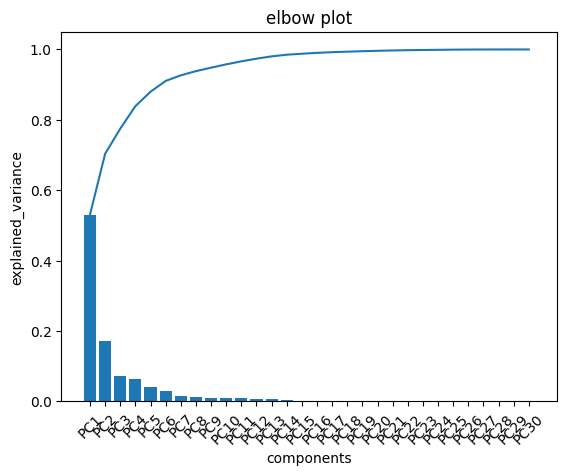

In [98]:
PC_list = ['PC'+str(i+1) for i in range(30)]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=45);

## PCA n_components = 2

In [107]:
pca = PCA(n_components=2)

In [108]:
X_2 = pca.fit_transform(X)

In [109]:
X_2.shape

(569, 2)

## Visulization

[]

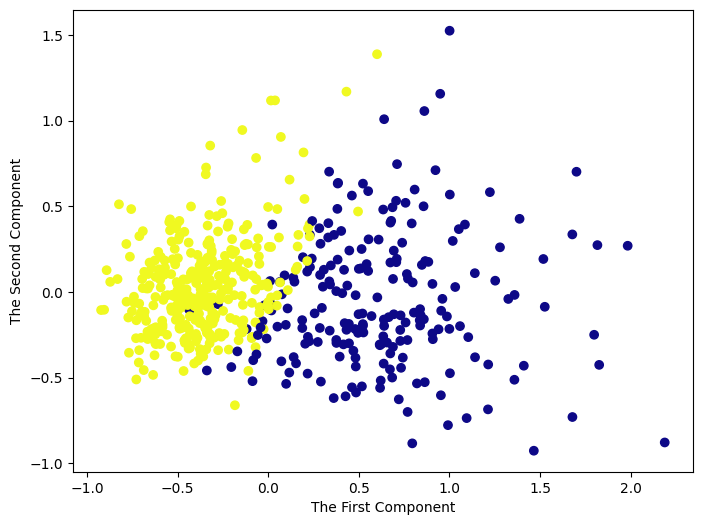

In [110]:
# plt setup
plt.figure(figsize=(8,6))
plt.scatter(X_2[:,0],X_2[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('The First Component')
plt.ylabel('The Second Component')
plt.plot()

[]

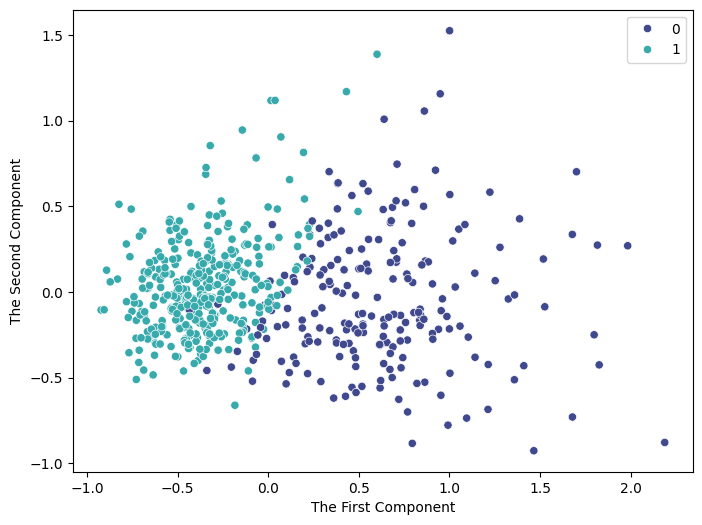

In [111]:
# sns setup
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2[:,0],y=X_2[:,1],hue=cancer['target'],palette='mako')
plt.xlabel('The First Component')
plt.ylabel('The Second Component')
plt.plot()

In [112]:
# show importance of each components
pca.components_

array([[ 2.42671811e-01,  9.64848287e-02,  2.52542331e-01,
         2.16496684e-01,  1.09703176e-01,  2.40380636e-01,
         3.01902509e-01,  3.22480531e-01,  1.11431571e-01,
         4.33010430e-02,  1.21764539e-01, -3.94405054e-05,
         1.18587197e-01,  1.03572767e-01, -4.68428078e-03,
         1.29323835e-01,  6.56777256e-02,  1.24749719e-01,
         1.44878260e-02,  4.55012795e-02,  2.59378557e-01,
         1.13827140e-01,  2.60709787e-01,  2.05924525e-01,
         1.23774396e-01,  2.04998595e-01,  2.44087876e-01,
         3.71071998e-01,  9.59276552e-02,  9.46367734e-02],
       [-2.61320329e-01, -5.90571464e-02, -2.38585804e-01,
        -2.31100600e-01,  1.99896793e-01,  2.13905980e-01,
         1.13814515e-01, -8.30198190e-03,  2.11114054e-01,
         4.06390195e-01, -6.68912471e-02,  6.00121655e-02,
        -5.14158882e-02, -8.29661957e-02,  1.35580977e-01,
         2.22346375e-01,  1.02783927e-01,  1.05644827e-01,
         1.40466864e-01,  1.71989851e-01, -2.44283858e-

## Heat Map

In [113]:
comp = pd.DataFrame(pca.components_ ,columns = cancer['feature_names'])

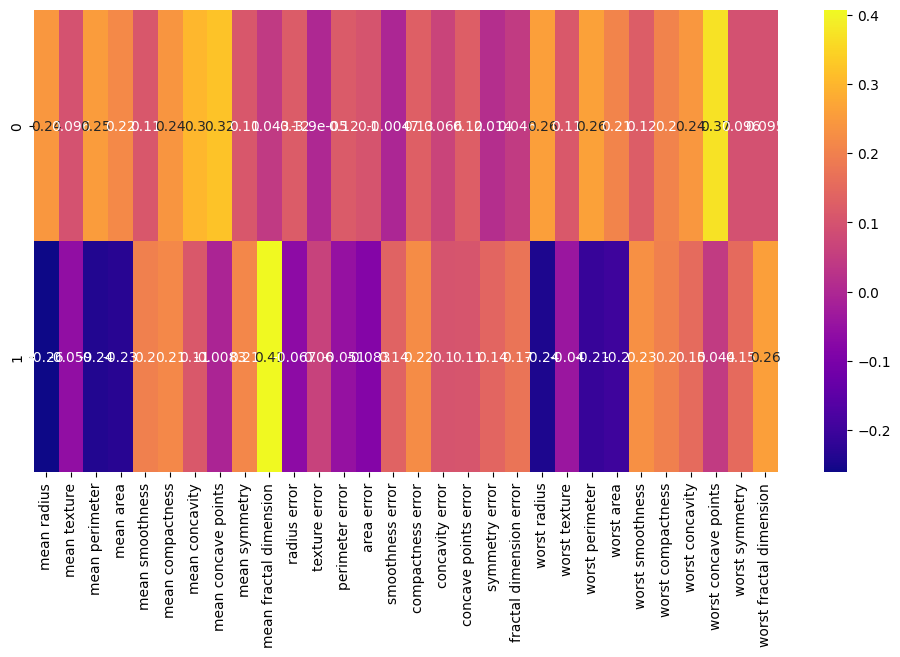

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(data=comp, annot=True,cmap = 'plasma')
plt.show()

## Evaluation of PCA with 2 components

In [75]:
print(pca.explained_variance_ratio_)

[0.53097556 0.17283798]


In [76]:
# show the percentage of component's importance
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[53.1  17.28]


### The first principal component retains a significant amount of information (53.1%), and the second principal component contributes additional information (17.28%).Totally they contribute 70.38 % information.

## Elbow Plot for 2 components

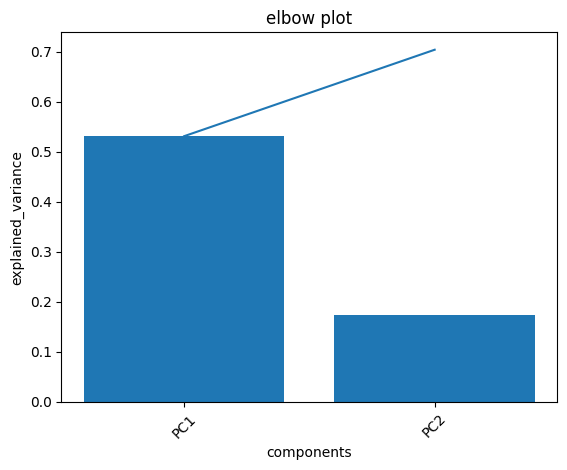

In [88]:
PC_list = [ 'PC'+str(i+1) for i in range(2)]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=45);

## PCA n_components = 6

In [115]:
pca = PCA(n_components= 6)

In [117]:
X_6 = pca.fit_transform(X)

In [118]:
print(pca.explained_variance_)

[0.33133197 0.10785195 0.04439493 0.04000715 0.02549616 0.01916585]


In [119]:
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[53.1  17.28  7.11  6.41  4.09  3.07]


### The total information retained is the sum of the explained variance ratios of all the principal components. From your provided values:

53.1%+17.28%+7.11%+6.41%+4.09%+3.07%= 91.06 %

## Elbow Plot for 6 components

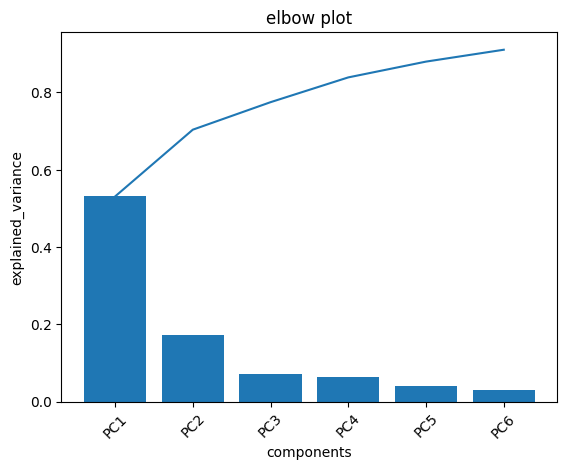

In [120]:
PC_list = ['PC'+str(i+1) for i in range(6)]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=45);

## PCA n_components = 8

In [121]:
pca=PCA(n_components= 8)

In [122]:
X_8 =pca.fit_transform(X)

In [123]:
print(np.round(pca.explained_variance_ratio_ *100 ,2))

[53.1  17.28  7.11  6.41  4.09  3.07  1.58  1.19]


### The total information retained is the sum of the explained variance ratios of all the principal components. From your provided values:

53.1%+17.28%+7.11%+6.41%+4.09%+3.07% + 1.58% + 1.19% = 94.83 %

## Elbow Plot for 8 components

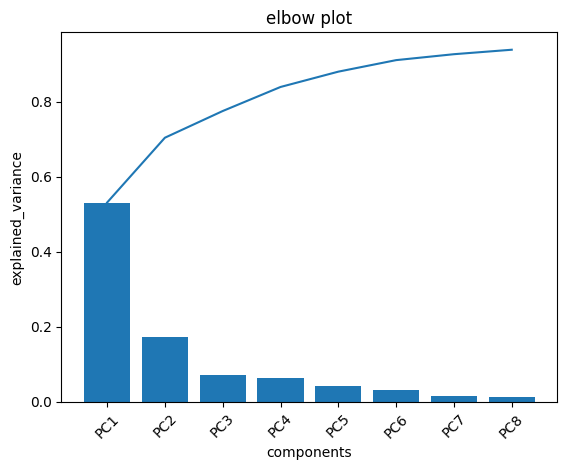

In [124]:
PC_list = ['PC'+str(i+1) for i in range(8)]
plt.bar(PC_list, pca.explained_variance_ratio_ )
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.title('elbow plot')
plt.xlabel('components')
plt.ylabel('explained_variance')
plt.xticks(rotation=45);